In [1]:
from bci_solver_mol2tools import *
from bci_solver_optimization import *
from bci_solver_visualization import *

# Discussão do Problema

O propósito deste script é tentar recuperar informações acerca dos $\textit{bond charge increments}$ de uma interação interatômica a partir das cargas dos átomos que constituem uma dada molécula. Mais precisamente, dada uma molécula qualquer com seus átomos enumerados, a carga de cada átomo desta molécula no modelo MMFF94 pode ser obtida através dos $\textit{bci}$ através de:
$$
q_{j} = q_{I_{j}}^{0} + \sum\limits_{\text{k está ligado a j}} \omega_{I_{k},I_{j}}
$$
Onde:

* $q_{j}$ é a carga do $j$-ésimo átomo constituinte.

* $I_{j}$ se refere ao $\textit{MMFF94 atom type}$ do $j$-ésimo átomo, assim como, analogamente, $I_{k}$ se refere ao $\textit{atom type}$ do $k$-ésimo átomo

* $q_{I_{j}}^{0}$ é a carga atômica parcial para os átomos de $\textit{atom type}$ $I_{j}$ e $\omega_{I_{k}, I_{j}}$ é o $\textit{bond charge increment}$ $(bci)$ resultante da interação entre os átomos ligantes $j$ e $k$ de tipos $I_{j}$ e $I_{k}$ - respectivamente.

* Para quaisquer $\textit{atom types}$ $I_{j},I_{k}$ vale que $\omega_{I_{j},I_{k}} = - \omega_{I_{k},I_{j}}$.

Assim, tendo conhecimento de todos os $\textit{bci}$ para os $\textit{atom types}$ presentes em uma molécula, é possível obter as cargas de qualquer átomo constituente - uma vez que conhecemos quem são seus átomos vizinhos/ligantes.

Reciprocamente, o problema que este script tenta solucionar é, dada uma molécula e o conhecimento de todas as cargas $q_{j}$ e $q_{I_{j}}^{0}$, podemos recuperar os valores de $\omega_{I_{k}, I_{j}}$ com algum grau de precisão?

Notemos que se temos uma molécula de $N$ átomos:
$$
q_{j} - q_{I_{j}}^{0} = \sum\limits_{\text{k está ligado a j}} \omega_{I_{k},I_{j}}
$$
Determina um sistema linear de $N$ equações e no máximo $\binom{N}{2}$ valores desconhecidos - correspondente aos $\textit{bci}$. Nós então queremos resolver o sistema:

$$
\Delta q = B \omega
$$

Onde $\Delta q$ é o vetor de coordenadas dadas por $q_{j} - q^{0}_{j}$, $\omega$ o vetor de $\textit{bcis}$ desconhecidos $\omega_{I_{k}, I_{j}}$, com $k < j$ e $B$ a matriz de coeficientes de cada $\omega_{I_{k}, I_{j}}$ para o sistema linear especificado por uma molécula.

Nesta célula, você poderá utilizar as funções disponíveis no bci_solver de maneira guiada. 

Por favor, informe se pretende calcular os valores de bci para apenas um arquivo mol2 digitando 1, ou se pretende calcular para múltiplos arquivos mol2 em uma mesma pasta digitando 2: 

2
Digite o caminho para a pasta com os arquivos mol2: 

/home/molmod-cs/Área de Trabalho/Cargas - Fase Sólida
As cargas para o cálculo estão disponíveis nos próprio arquivos mol2 pertencentes à pasta (1) ou em uma pasta externa (2)?: 

1
Os arquivos gerados foram salvos na pasta \Computational Chemistry\bci_solver\Output


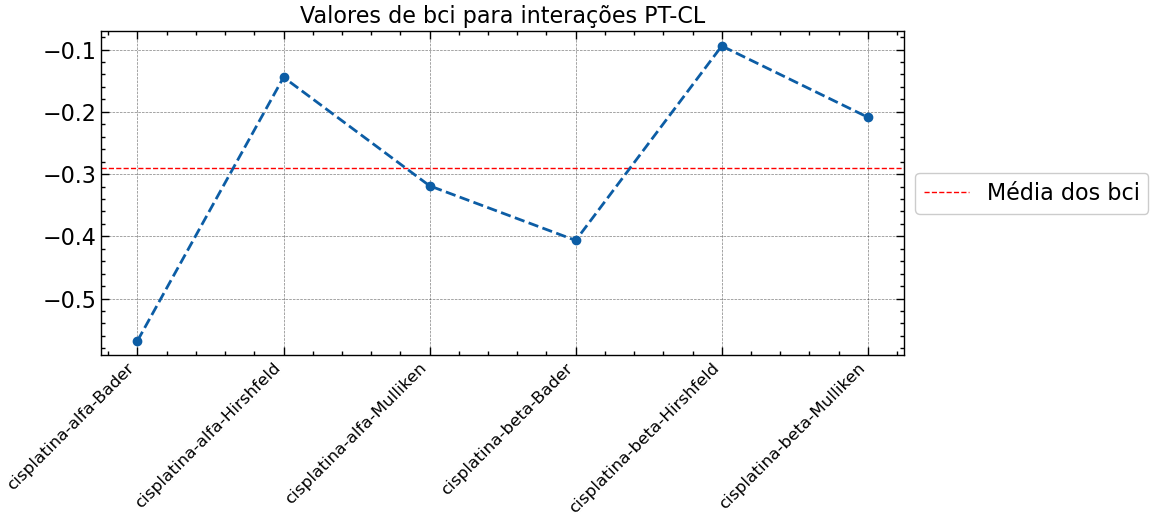

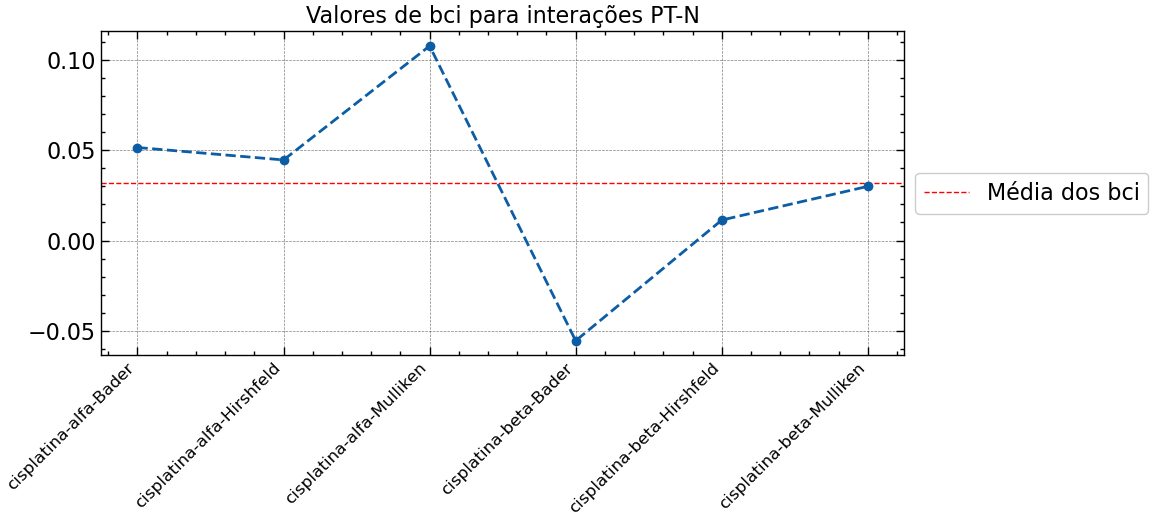

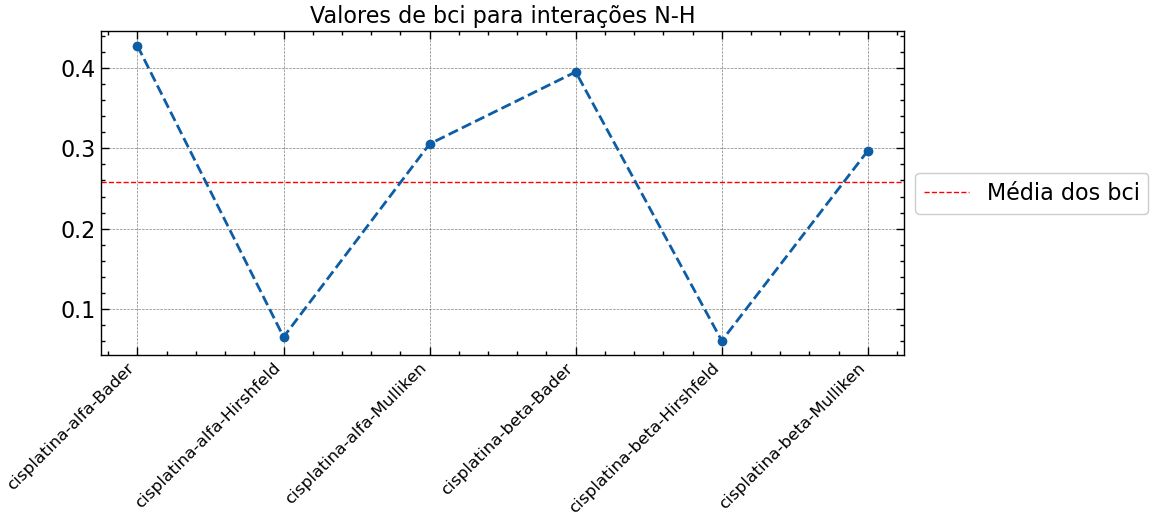

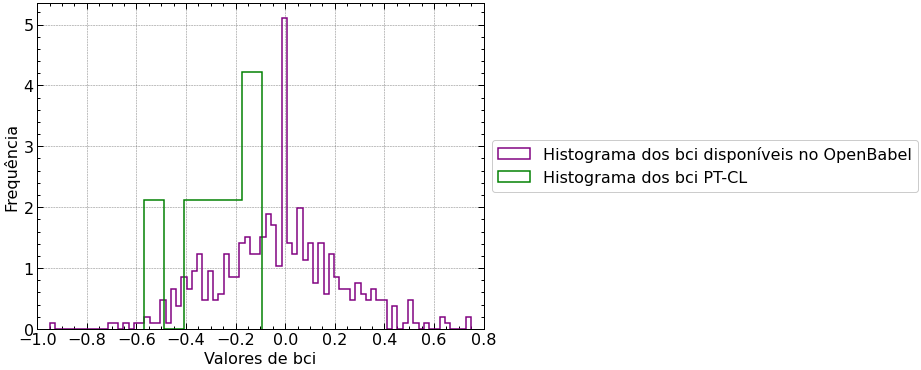

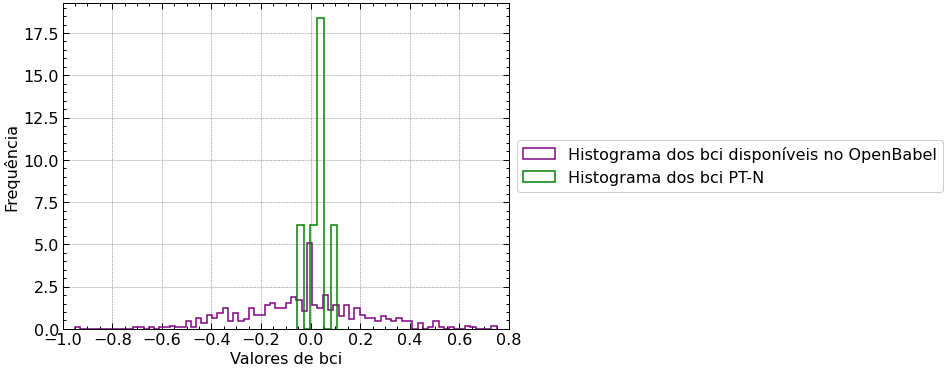

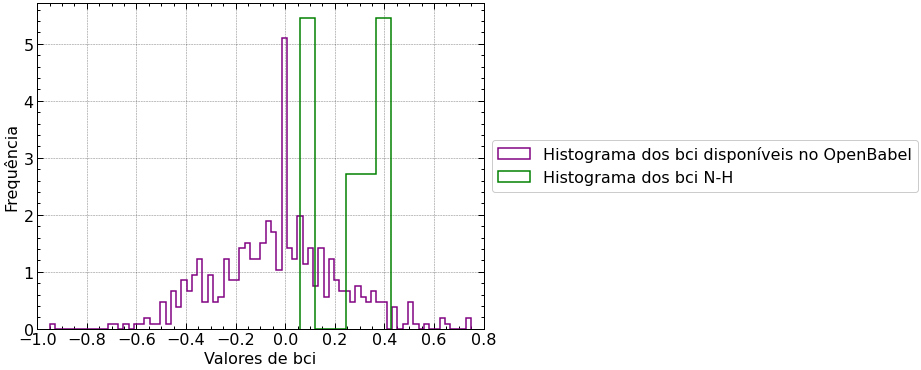

In [2]:
folder_or_single = int(input('''Nesta célula, você poderá utilizar as funções disponíveis no bci_solver de maneira guiada. 

Por favor, informe se pretende calcular os valores de bci para apenas um arquivo mol2 digitando 1, ou se pretende calcular para múltiplos arquivos mol2 em uma mesma pasta digitando 2: \n\n'''))

while folder_or_single !=1 and folder_or_single !=2:
    folder_or_single = int(input('''Por favor, informe se pretende calcular os valores de bci para apenas um arquivo mol2 digitando "1", ou se pretende calcular para múltiplos arquivos mol2 em uma mesma pasta digitando "2": \n'''))

if folder_or_single == 1:
    mol2_file_path = input('''Digite o caminho para o arquivo mol2: \n\n''')
    charges_question = int(input('''As cargas para o cálculo estão disponíveis no próprio arquivo mol2 (1) ou em um arquivo externo (2)?: \n\n'''))
    if charges_question == 2:
        charges_format = input('''Atualmente, os arquivos aceitos para o input das cargas são arquivos .log do orca, arquivos de carga em formato xyz e planilhas. Digite "log" se as cargas estão disponíveis num arquivo .log, "xyz" se estão disponíveis em um arquivo xyz ou "planilha" se estão disponíveis em uma planilha: ''')
        charges_file_path = input('''Finalmente, informe o caminho para o arquivo (com a extensão) com as cargas: \n\n''')
        if charges_format.lower() == 'log':
            mol2_file_path = charges_log2mol2(mol2_file_path,charges_file_path)
        if charges_format.lower() == 'xyz':
            mol2_file_path = charges2mol2(mol2_file_path,charges_file_path)
        if charges_format.lower() == 'planilha':
            mol2_file_path = dataframe2mol2(mol2_file_path,charges_file_path)
    bci_solver_mol2(mol2_file_path)
    
else:
    mol2_folder_path = input('''Digite o caminho para a pasta com os arquivos mol2: \n\n''')
    charges_question = int(input('''As cargas para o cálculo estão disponíveis nos próprio arquivos mol2 pertencentes à pasta (1) ou em uma pasta externa (2)?: \n\n'''))
    if charges_question == 2:
        charges_format = input('''Atualmente, os arquivos aceitos para o input das cargas são arquivos .log do orca, arquivos de carga em formato xyz e planilhas. Digite "log" se as cargas estão disponíveis num arquivo .log, "xyz" se estão disponíveis em um arquivo xyz ou "planilha" se estão disponíveis em uma planilha: \n\n''')
        if charges_format.lower() == 'log':
            charges_folder_path = input('''Informe o caminho para a pasta com as cargas. Tenha certeza de que tanto a pasta com os arquivos mol2 quanto a pasta com as cargas estão ordenadas de tal forma que o i-ésimo arquivo mol2 tem cargas correspondentes ao i-ésimo arquvivo pertencente à pasta com as cargas: \n\n''')
            mol2_folder_path = charges_log2mol2_folder(mol2_folder_path,charges_folder_path)
        if charges_format.lower() == 'xyz':
            charges_folder_path = input('''Informe o caminho para a pasta com as cargas. Tenha certeza de que tanto a pasta com os arquivos mol2 quanto a pasta com as cargas estão ordenadas de tal forma que o i-ésimo arquivo mol2 tem cargas correspondentes ao i-ésimo arquvivo pertencente à pasta com as cargas: \n\n''')
            mol2_folder_path = charges2mol2_folder(mol2_folder_path,charges_folder_path)
        if charges_format.lower() == 'planilha':
            charges_folder_path = input('''Informe o caminho para a planilha com as cargas. Tenha certeza de que tanto a pasta com os arquivos mol2 quanto as páginas da planilha com as cargas estão ordenadas de tal forma que o i-ésimo arquivo mol2 tem cargas correspondentes à i-ésima página da planilha com as cargas: \n\n''')
            mol2_folder_path = dataframe2mol2_folder(mol2_folder_path,charges_dataframe)
    bci_solver_mol2_folder(mol2_folder_path)
    bci_solver_visualizer(mol2_folder_path)
    bci_solver_hist_visualizer(mol2_folder_path)

print(r'Os arquivos gerados foram salvos na pasta \Computational Chemistry\bci_solver\Output')